In [1]:
import pandas as pd
import os
import glob
import numpy as np
import itertools as IT
import csv
import csv as cv 
import matplotlib.pyplot as plt
from pathlib import Path
import tkinter
import tkinter.filedialog
from numpy import genfromtxt
from pathlib import Path
import torch
import torchvision
from pylab import *
import pylab as p
import itertools
from itertools import product
from collections import Counter

In [2]:
path = 'C:\\Users\\makn0023\\Desktop\\Thesis\\PRData'
os.chdir(path)

In [3]:
pwd

'C:\\Users\\makn0023\\Desktop\\Thesis\\PRData'

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 48BD-20B4

 Directory of C:\Users\makn0023\Desktop\Thesis\PRData

04/15/2021  07:12 PM    <DIR>          .
04/15/2021  07:12 PM    <DIR>          ..
04/12/2021  07:31 AM           564,371 PR_LOD_0_0.0001_12.csv
04/12/2021  08:07 AM           563,739 PR_LOD_0_0.0001_14.csv
04/12/2021  07:27 AM           561,645 PR_LOD_0_0.0001_17.csv
04/12/2021  07:20 AM           564,448 PR_LOD_0_0.0001_24.csv
04/12/2021  07:17 AM           565,431 PR_LOD_0_0.0001_29.csv
04/12/2021  07:18 AM           562,182 PR_LOD_0_0.0001_3.csv
04/12/2021  07:17 AM           563,026 PR_LOD_0_0.0001_8.csv
04/12/2021  07:17 AM           563,210 PR_LOD_0_0.0001_9.csv
04/12/2021  08:01 AM           562,524 PR_LOD_0_0.001_0.csv
04/12/2021  07:24 AM           561,662 PR_LOD_0_0.001_13.csv
04/12/2021  07:25 AM           563,142 PR_LOD_0_0.001_15.csv
04/12/2021  07:28 AM           564,333 PR_LOD_0_0.001_16.csv
04/12/2021  07:25 AM           563,502 PR_LOD_0_0.001_18.

# Deleting less than 1800

In [45]:
for filename in glob.glob('PR_LOD_4_0.001_*.csv'):
        #print (filename)
    with open(filename) as myfile:
        df = pd.read_csv(myfile,index_col=None, header=0)
        print (str(df.index[-1])+" "+ str(filename))

1998 PR_LOD_4_0.001_1.csv
1998 PR_LOD_4_0.001_10.csv
1998 PR_LOD_4_0.001_25.csv
1998 PR_LOD_4_0.001_3.csv
1998 PR_LOD_4_0.001_4.csv
1998 PR_LOD_4_0.001_5.csv
1998 PR_LOD_4_0.001_6.csv
1998 PR_LOD_4_0.001_7.csv
1998 PR_LOD_4_0.001_8.csv
1998 PR_LOD_4_0.001_9.csv


In [5]:
#NOT Correct
df0_0001 = pd.DataFrame()
for f in glob.glob('PR_LOD_0_0.0001_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df0_0001 = df0_0001.append(a)
df0_0001=df0_0001.reset_index()
df0_0001 = df0_0001[['generation', 'ID','score','percentRank','filename']]

In [25]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_0_0.0001_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df0_0001=df.groupby(level=1).mean()

In [26]:
df0_0001

,Unnamed: 0,generation,ID,score,hits,bites,0_0,reward_0_0,0_1,reward_0_1,...,reward_2_3,3_0,reward_3_0,3_1,reward_3_1,3_2,reward_3_2,3_3,reward_3_3,percentRank
0,0.0,0.0,1.351250e+02,2.412917,0.000,0.000,0.875,0.047288,0.750,-0.078947,...,0.049052,0.750,0.253227,0.625,0.252116,0.875,-0.020157,0.625,-0.199151,0.620911
1,1.0,100.0,1.015012e+04,4.498916,0.000,0.000,2.125,0.047319,1.875,-0.078933,...,0.049047,1.125,0.253232,1.000,0.252124,2.500,-0.020170,1.250,-0.199102,0.671749
2,2.0,200.0,2.016875e+04,8.067935,1.125,1.250,1.875,0.050452,1.875,-0.077421,...,0.048505,1.500,0.253687,2.875,0.252871,2.000,-0.021524,1.875,-0.194266,0.647783
3,3.0,300.0,3.015475e+04,9.503449,0.000,0.000,2.375,0.053704,2.250,-0.075869,...,0.047919,2.625,0.254059,3.125,0.253637,1.500,-0.022855,3.750,-0.189429,0.615425
4,4.0,400.0,4.015000e+04,6.919566,0.000,0.000,1.125,0.057047,2.375,-0.074262,...,0.047289,2.125,0.254341,2.750,0.254427,2.125,-0.024164,2.625,-0.184580,0.534807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1994.0,199400.0,1.994013e+07,5.801586,0.000,0.000,2.000,0.377019,1.500,-0.034136,...,-0.057020,1.750,0.431869,1.875,0.040704,2.500,-0.232867,2.750,-0.048278,0.703007
1995,1995.0,199500.0,1.995016e+07,7.220700,0.000,0.000,2.500,0.378942,1.625,-0.035933,...,-0.058851,1.875,0.432105,1.750,0.042069,1.875,-0.235977,2.375,-0.048120,0.692030
1996,1996.0,199600.0,1.996016e+07,5.906527,0.000,0.000,2.500,0.380765,2.000,-0.037717,...,-0.060526,2.250,0.432285,3.625,0.043380,2.375,-0.239100,2.375,-0.047831,0.632414
1997,1997.0,199700.0,1.997014e+07,4.931481,0.125,0.375,2.000,0.382486,2.625,-0.039447,...,-0.062007,1.250,0.432415,2.000,0.044640,1.250,-0.242234,0.750,-0.047408,0.692245


In [66]:
#NOT Correct
df0_001 = pd.DataFrame()
for f in glob.glob('PR_LOD_0_0.001_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df0_001 = df0_001.append(a)
df0_001=df0_001.reset_index()
df0_001 = df0_001[['generation', 'ID','score','percentRank','filename']]

In [3]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_0_0.001_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df0_001=df.groupby(level=1).mean()

In [68]:
#NOT Correct
df0_01 = pd.DataFrame()
for f in glob.glob('PR_LOD_0_0.01_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df0_01 = df0_01.append(a)
df0_01=df0_01.reset_index()
df0_01 = df0_01[['generation', 'ID','score','percentRank','filename']]

In [4]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_0_0.01_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df0_01=df.groupby(level=1).mean()

In [70]:
#NOT Correct
df0_1 = pd.DataFrame()
for f in glob.glob('PR_LOD_0_0.1_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df0_1 = df0_1.append(a)
df0_1=df0_1.reset_index()
df0_1 = df0_1[['generation', 'ID','score','percentRank','filename']]

In [5]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_0_0.1_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df0_1=df.groupby(level=1).mean()

In [71]:
df0_1

,generation,ID,score,percentRank,filename
0,0,107,0.834495,0.985397,PR_LOD_0_0.1_0.csv
1,100,10119,1.845013,0.983902,PR_LOD_0_0.1_0.csv
2,200,20136,1.364053,0.895676,PR_LOD_0_0.1_0.csv
3,300,30112,4.382802,0.678207,PR_LOD_0_0.1_0.csv
4,400,40182,3.919040,0.755371,PR_LOD_0_0.1_0.csv
...,...,...,...,...,...
39827,199400,19940152,0.276826,0.662460,PR_LOD_0_0.1_8.csv
39828,199500,19950129,1.794516,0.579910,PR_LOD_0_0.1_8.csv
39829,199600,19960113,3.527241,0.957703,PR_LOD_0_0.1_8.csv
39830,199700,19970123,7.163677,0.921066,PR_LOD_0_0.1_8.csv


In [9]:
#NOT Correct
df1_0001 = pd.DataFrame()
for f in glob.glob('PR_LOD_1_0.0001_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df1_0001 = df1_0001.append(a)
df1_0001=df1_0001.reset_index()
df1_0001 = df1_0001[['generation', 'ID','score','percentRank','filename']]

In [6]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_1_0.0001_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df1_0001=df.groupby(level=1).mean()

In [73]:
#NOT Correct
df1_001 = pd.DataFrame()
for f in glob.glob('PR_LOD_1_0.001_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df1_001 = df1_001.append(a)
df1_001=df1_001.reset_index()
df1_001 = df1_001[['generation', 'ID','score','percentRank','filename']]

In [7]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_1_0.001_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df1_001=df.groupby(level=1).mean()

In [74]:
#NOT Correct
df1_01 = pd.DataFrame()
for f in glob.glob('PR_LOD_1_0.01_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df1_01 = df1_01.append(a)
df1_01=df1_01.reset_index()
df1_01 = df1_01[['generation', 'ID','score','percentRank','filename']]

In [8]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_1_0.01_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df1_01=df.groupby(level=1).mean()

In [75]:
#NOT Correct
df1_1 = pd.DataFrame()
for f in glob.glob('PR_LOD_1_0.1_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df1_1 = df1_1.append(a)
df1_1=df1_1.reset_index()
df1_1 = df1_1[['generation', 'ID','score','percentRank','filename']]

In [9]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_1_0.1_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df1_1=df.groupby(level=1).mean()

In [80]:
df1_1

,generation,ID,score,percentRank,filename
0,0,158,1.241156,0.999817,PR_LOD_1_0.1_0.csv
1,100,10122,0.235540,0.700974,PR_LOD_1_0.1_0.csv
2,200,20137,1.276037,0.648758,PR_LOD_1_0.1_0.csv
3,300,30127,0.895938,0.979767,PR_LOD_1_0.1_0.csv
4,400,40181,0.422364,0.997665,PR_LOD_1_0.1_0.csv
...,...,...,...,...,...
37624,199400,19940180,5.270895,0.490814,PR_LOD_1_0.1_9.csv
37625,199500,19950105,2.728421,0.983902,PR_LOD_1_0.1_9.csv
37626,199600,19960161,1.360328,0.996414,PR_LOD_1_0.1_9.csv
37627,199700,19970136,7.662328,0.460785,PR_LOD_1_0.1_9.csv


In [81]:
#NOT Correct
df2_0001 = pd.DataFrame()
for f in glob.glob('PR_LOD_2_0.0001_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df2_0001 = df2_0001.append(a)
df2_0001=df2_0001.reset_index()
df2_0001 = df2_0001[['generation', 'ID','score','percentRank','filename']]

In [10]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_2_0.0001_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df2_0001=df.groupby(level=1).mean()

In [82]:
#NOT Correct
df2_001 = pd.DataFrame()
for f in glob.glob('PR_LOD_2_0.001_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df2_001 = df2_001.append(a)
df2_001=df2_001.reset_index()
df2_001 = df2_001[['generation', 'ID','score','percentRank','filename']]

In [11]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_2_0.001_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df2_001=df.groupby(level=1).mean()

In [83]:
#NOT Correct
df2_01 = pd.DataFrame()
for f in glob.glob('PR_LOD_2_0.01_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df2_01 = df2_01.append(a)
df2_01=df2_01.reset_index()
df2_01 = df2_01[['generation', 'ID','score','percentRank','filename']]

In [12]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_2_0.01_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df2_01=df.groupby(level=1).mean()

In [84]:
#NOT Correct
df2_1 = pd.DataFrame()
for f in glob.glob('PR_LOD_2_0.1_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df2_1 = df2_1.append(a)
df2_1=df2_1.reset_index()
df2_1 = df2_1[['generation', 'ID','score','percentRank','filename']]

In [13]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_2_0.1_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df2_1=df.groupby(level=1).mean()

In [88]:
df2_1

,generation,ID,score,percentRank,filename
0,0,102,1.468980,0.979691,PR_LOD_2_0.1_10.csv
1,100,10196,0.312990,0.995560,PR_LOD_2_0.1_10.csv
2,200,20185,1.704296,0.858841,PR_LOD_2_0.1_10.csv
3,300,30191,0.852987,0.715210,PR_LOD_2_0.1_10.csv
4,400,40187,2.161837,0.423279,PR_LOD_2_0.1_10.csv
...,...,...,...,...,...
33669,199400,19940131,8.673496,0.813431,PR_LOD_2_0.1_9.csv
33670,199500,19950166,13.452295,0.495285,PR_LOD_2_0.1_9.csv
33671,199600,19960171,1.036506,0.967819,PR_LOD_2_0.1_9.csv
33672,199700,19970169,0.236661,0.999542,PR_LOD_2_0.1_9.csv


In [89]:
#NOT Correct
df3_0001 = pd.DataFrame()
for f in glob.glob('PR_LOD_3_0.0001_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df3_0001 = df3_0001.append(a)
df3_0001=df3_0001.reset_index()
df3_0001 = df3_0001[['generation', 'ID','score','percentRank','filename']]

In [14]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_3_0.0001_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df3_0001=df.groupby(level=1).mean()

In [90]:
#NOT Correct
df3_001 = pd.DataFrame()
for f in glob.glob('PR_LOD_3_0.001_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df3_001 = df3_001.append(a)
df3_001=df3_001.reset_index()
df3_001 = df3_001[['generation', 'ID','score','percentRank','filename']]

In [15]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_3_0.001_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df3_001=df.groupby(level=1).mean()

In [91]:
#NOT Correct
df3_01 = pd.DataFrame()
for f in glob.glob('PR_LOD_3_0.01_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df3_01 = df3_01.append(a)
df3_01=df3_01.reset_index()
df3_01 = df3_01[['generation', 'ID','score','percentRank','filename']]

In [16]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_3_0.01_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df3_01=df.groupby(level=1).mean()

In [92]:
#NOT Correct
df3_1 = pd.DataFrame()
for f in glob.glob('PR_LOD_3_0.1_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df3_1 = df3_1.append(a)
df3_1=df3_1.reset_index()
df3_1 = df3_1[['generation', 'ID','score','percentRank','filename']]

In [17]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_3_0.1_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df3_1=df.groupby(level=1).mean()

In [96]:
df3_1

,generation,ID,score,percentRank,filename
0,0,111,3.260225,0.524261,PR_LOD_3_0.1_16.csv
1,100,10136,9.242051,0.692703,PR_LOD_3_0.1_16.csv
2,200,20103,1.159911,0.996262,PR_LOD_3_0.1_16.csv
3,300,30183,9.332338,0.892822,PR_LOD_3_0.1_16.csv
4,400,40155,7.274917,0.493759,PR_LOD_3_0.1_16.csv
...,...,...,...,...,...
21984,199400,19940185,1.899853,0.591690,PR_LOD_3_0.1_3.csv
21985,199500,19950118,7.381523,0.702591,PR_LOD_3_0.1_3.csv
21986,199600,19960110,0.921084,0.999573,PR_LOD_3_0.1_3.csv
21987,199700,19970116,0.276252,0.997620,PR_LOD_3_0.1_3.csv


In [97]:
#NOT Correct
df4_0001 = pd.DataFrame()
for f in glob.glob('PR_LOD_4_0.0001_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df4_0001 = df4_0001.append(a)
df4_0001=df4_0001.reset_index()
df4_0001 = df4_0001[['generation', 'ID','score','percentRank','filename']]

In [18]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_4_0.0001_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df4_0001=df.groupby(level=1).mean()

In [98]:
#NOT Correct
df4_001 = pd.DataFrame()
for f in glob.glob('PR_LOD_4_0.001_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df4_001 = df4_001.append(a)
df4_001=df4_001.reset_index()
df4_001 = df4_001[['generation', 'ID','score','percentRank','filename']]

In [19]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_4_0.001_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df4_001=df.groupby(level=1).mean()

In [99]:
#NOT Correct
df4_01 = pd.DataFrame()
for f in glob.glob('PR_LOD_4_0.01_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df4_01 = df4_01.append(a)
df4_01=df4_01.reset_index()
df4_01 = df4_01[['generation', 'ID','score','percentRank','filename']]

In [20]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_4_0.01_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df4_01=df.groupby(level=1).mean()

In [100]:
#NOT Correct
df4_1 = pd.DataFrame()
for f in glob.glob('PR_LOD_4_0.1_*.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    a = df
    df4_1 = df4_1.append(a)
df4_1=df4_1.reset_index()
df4_1 = df4_1[['generation', 'ID','score','percentRank','filename']]

In [21]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\PRData")
data = {}
for i in range(0,30):
    try:
        f = p / f"PR_LOD_4_0.1_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
df4_1=df.groupby(level=1).mean()

In [104]:
df4_1

,generation,ID,score,percentRank,filename
0,0,100,0.000000,0.000000,PR_LOD_4_0.1_0.csv
1,100,10155,0.000000,0.000000,PR_LOD_4_0.1_0.csv
2,200,20197,0.249199,0.961639,PR_LOD_4_0.1_0.csv
3,300,30146,4.890286,0.801392,PR_LOD_4_0.1_0.csv
4,400,40158,4.522019,0.603989,PR_LOD_4_0.1_0.csv
...,...,...,...,...,...
31759,198400,19840192,1.149235,0.947571,PR_LOD_4_0.1_9.csv
31760,198500,19850138,0.683078,0.772583,PR_LOD_4_0.1_9.csv
31761,198600,19860168,0.729832,0.987671,PR_LOD_4_0.1_9.csv
31762,198700,19870144,0.270943,0.992325,PR_LOD_4_0.1_9.csv


In [27]:
print(df0_0001)

      Unnamed: 0  generation            ID     score    hits   bites    0_0  \
0            0.0         0.0  1.351250e+02  2.412917   0.000   0.000  0.875   
1            1.0       100.0  1.015012e+04  4.498916   0.000   0.000  2.125   
2            2.0       200.0  2.016875e+04  8.067935   1.125   1.250  1.875   
3            3.0       300.0  3.015475e+04  9.503449   0.000   0.000  2.375   
4            4.0       400.0  4.015000e+04  6.919566   0.000   0.000  1.125   
...          ...         ...           ...       ...     ...     ...    ...   
1994      1994.0    199400.0  1.994013e+07  5.801586   0.000   0.000  2.000   
1995      1995.0    199500.0  1.995016e+07  7.220700   0.000   0.000  2.500   
1996      1996.0    199600.0  1.996016e+07  5.906527   0.000   0.000  2.500   
1997      1997.0    199700.0  1.997014e+07  4.931481   0.125   0.375  2.000   
1998      1998.0    199800.0  1.998015e+07  4.539810  59.375  58.750  1.375   

      reward_0_0    0_1  reward_0_1  ...  reward_2_

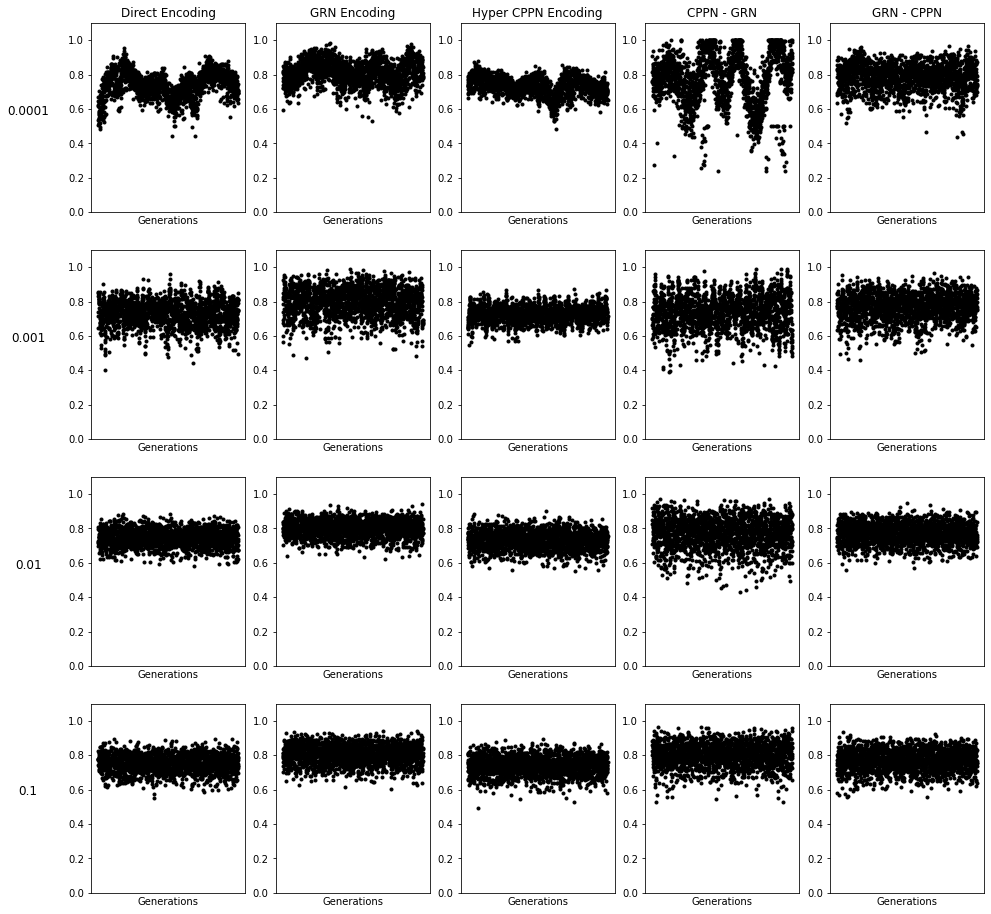

In [28]:
figsize=(16,16)
fig1, ax = plt.subplots(4, 5, figsize=figsize, constrained_layout=False)
ax[0,0].set_title('Direct Encoding')
ax[0,0].set_ylabel('0.0001', rotation=0, fontsize=12, labelpad=40)
ax[0,0].set_ylim([0, 1.1])
ax[0,0].set_xticks([])
ax[0,0].set_xlabel('Generations')
ax[0,0].plot(df0_0001["percentRank"],'k.')

ax[0,1].set_title('GRN Encoding')
ax[0,1].set_ylim([0, 1.1])
ax[0,1].set_xticks([])
ax[0,1].set_xlabel('Generations')
ax[0,1].plot(df1_0001["percentRank"],'k.')

ax[0,2].set_title('Hyper CPPN Encoding')
ax[0,2].set_ylim([0, 1.1])
ax[0,2].set_xticks([])
ax[0,2].set_xlabel('Generations')
ax[0,2].plot(df2_0001["percentRank"],'k.')

ax[0,3].set_title('CPPN - GRN')
ax[0,3].set_ylim([0, 1.1])
ax[0,3].set_xticks([])
ax[0,3].set_xlabel('Generations')
ax[0,3].plot(df3_0001["percentRank"],'k.')

ax[0,4].set_title('GRN - CPPN')
ax[0,4].set_ylim([0, 1.1])
ax[0,4].set_xticks([])
ax[0,4].set_xlabel('Generations')
ax[0,4].plot(df4_0001["percentRank"],'k.')

ax[1,0].set_ylabel('0.001', rotation=0, fontsize=12, labelpad=40)
ax[1,0].set_ylim([0, 1.1])
ax[1,0].set_xticks([])
ax[1,0].set_xlabel('Generations')
ax[1,0].plot(df0_001["percentRank"],'k.')

ax[1,1].set_ylim([0, 1.1])
ax[1,1].set_xticks([])
ax[1,1].set_xlabel('Generations')
ax[1,1].plot(df1_001["percentRank"],'k.')

ax[1,2].set_ylim([0, 1.1])
ax[1,2].set_xticks([])
ax[1,2].set_xlabel('Generations')
ax[1,2].plot(df2_001["percentRank"],'k.')

ax[1,3].set_ylim([0, 1.1])
ax[1,3].set_xticks([])
ax[1,3].set_xlabel('Generations')
ax[1,3].plot(df3_001["percentRank"],'k.')

ax[1,4].set_ylim([0, 1.1])
ax[1,4].set_xticks([])
ax[1,4].set_xlabel('Generations')
ax[1,4].plot(df4_001["percentRank"],'k.')

ax[2,0].set_ylabel('0.01', rotation=0, fontsize=12, labelpad=40)
ax[2,0].set_ylim([0, 1.1])
ax[2,0].set_xticks([])
ax[2,0].set_xlabel('Generations')
ax[2,0].plot(df0_01["percentRank"],'k.')

ax[2,1].set_ylim([0, 1.1])
ax[2,1].set_xticks([])
ax[2,1].set_xlabel('Generations')
ax[2,1].plot(df1_01["percentRank"],'k.')

ax[2,2].set_ylim([0, 1.1])
ax[2,2].set_xticks([])
ax[2,2].set_xlabel('Generations')
ax[2,2].plot(df2_01["percentRank"],'k.')

ax[2,3].set_ylim([0, 1.1])
ax[2,3].set_xticks([])
ax[2,3].set_xlabel('Generations')
ax[2,3].plot(df3_01["percentRank"],'k.')

ax[2,4].set_ylim([0, 1.1])
ax[2,4].set_xticks([])
ax[2,4].set_xlabel('Generations')
ax[2,4].plot(df4_01["percentRank"],'k.')

ax[3,0].set_ylabel('0.1', rotation=0, fontsize=12, labelpad=40)
ax[3,0].set_ylim([0, 1.1])
ax[3,0].set_xticks([])
ax[3,0].set_xlabel('Generations')
ax[3,0].plot(df0_1["percentRank"],'k.')

ax[3,1].set_ylim([0, 1.1])
ax[3,1].set_xticks([])
ax[3,1].set_xlabel('Generations')
ax[3,1].plot(df1_1["percentRank"],'k.')

ax[3,2].set_ylim([0, 1.1])
ax[3,2].set_xticks([])
ax[3,2].set_xlabel('Generations')
ax[3,2].plot(df2_1["percentRank"],'k.')

ax[3,3].set_ylim([0, 1.1])
ax[3,3].set_xticks([])
ax[3,3].set_xlabel('Generations')
ax[3,3].plot(df3_1["percentRank"],'k.')

ax[3,4].set_ylim([0, 1.1])
ax[3,4].set_xticks([])
ax[3,4].set_xlabel('Generations')
ax[3,4].plot(df4_1["percentRank"],'k.')

In [26]:
path = 'C:\\Users\\makn0023\\Desktop\\Thesis\\PRData'
os.chdir(path)

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


[Text(1, 0, 'Direct Encoding'),
 Text(2, 0, 'GRN Encoding'),
 Text(3, 0, 'Hyper CPPN Encoding'),
 Text(4, 0, 'CPPN-GRN'),
 Text(5, 0, 'GRN-CPPN')]

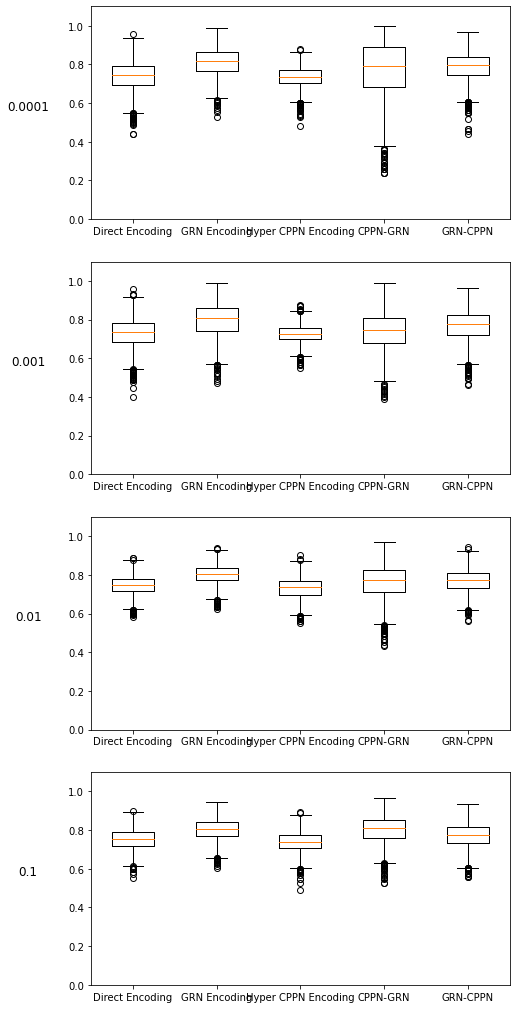

In [29]:
figsize=(7.5,18)
data1 = [df0_0001["percentRank"], df1_0001["percentRank"],df2_0001["percentRank"],df3_0001["percentRank"],df4_0001["percentRank"]]
fig1, ax = plt.subplots(4, 1, figsize=figsize, constrained_layout=False) 
# ax[0].set_title('Direct Encoding        GRN Encoding  Hyper CPPN Encoding      CPPN-GRN             GRN-CPPN        ')
ax[0].set_ylim([0, 1.1])
ax[0].set_xticklabels(['Direct Encoding','GRN Encoding','Hyper CPPN Encoding','CPPN-GRN','GRN-CPPN'])
ax[0].set_ylabel('0.0001', rotation=0, fontsize=12, labelpad=40)
ax[0].boxplot(data1)

ax[1].set_ylim([0, 1.1])
ax[1].set_ylabel('0.001', rotation=0, fontsize=12, labelpad=40)
data2 = [df0_001["percentRank"], df1_001["percentRank"],df2_001["percentRank"],df3_001["percentRank"],df4_001["percentRank"]]
ax[1].boxplot(data2)
ax[1].set_xticklabels(['Direct Encoding','GRN Encoding','Hyper CPPN Encoding','CPPN-GRN','GRN-CPPN'])

ax[2].set_ylim([0, 1.1])
ax[2].set_ylabel('0.01', rotation=0, fontsize=12, labelpad=40)
data3 = [df0_01["percentRank"], df1_01["percentRank"],df2_01["percentRank"],df3_01["percentRank"],df4_01["percentRank"]]
ax[2].boxplot(data3)
ax[2].set_xticklabels(['Direct Encoding','GRN Encoding','Hyper CPPN Encoding','CPPN-GRN','GRN-CPPN'])

ax[3].set_ylim([0, 1.1])
ax[3].set_ylabel('0.1', rotation=0, fontsize=12, labelpad=40)
data4 = [df0_1["percentRank"], df1_1["percentRank"],df2_1["percentRank"],df3_1["percentRank"],df4_1["percentRank"]]
ax[3].boxplot(data4)
ax[3].set_xticklabels(['Direct Encoding','GRN Encoding','Hyper CPPN Encoding','CPPN-GRN','GRN-CPPN'])
# print(data)

In [30]:
from scipy import stats

In [31]:
len(df0_0001)

1999

In [32]:
d1 = []
d2 = []
d3 = []
d4 = []
d5 = []
for i in range(2000):
    try:
        d1.extend(df0_0001[i]["percentRank"])
        d2.extend(df0_001[i]["percentRank"])
        d3.extend(df0_01[i]["percentRank"])
        d3.extend(df0_1[i]["percentRank"])
#         d3.extend(df0_0001[i]["Score"])
    except:
        pass

In [40]:
df1_0001

,Unnamed: 0,generation,ID,score,hits,bites,0_0,reward_0_0,0_1,reward_0_1,...,reward_2_3,3_0,reward_3_0,3_1,reward_3_1,3_2,reward_3_2,3_3,reward_3_3,percentRank
0,0.0,0.0,1.704545e+02,2.665973,0.000000,0.000000,0.363636,-0.001653,0.818182,0.285339,...,-0.006872,0.909091,0.309419,0.818182,-0.209699,0.727273,0.159403,1.363636,-0.211678,0.809587
1,1.0,100.0,1.013964e+04,1.607656,0.181818,0.000000,1.000000,-0.001640,0.454545,0.285348,...,-0.006857,0.181818,0.309390,0.454545,-0.209698,0.636364,0.159438,0.363636,-0.211698,0.780719
2,2.0,200.0,2.014873e+04,2.223010,0.000000,0.000000,0.818182,-0.000408,0.272727,0.286190,...,-0.005401,0.545455,0.306617,0.909091,-0.209597,0.818182,0.162937,1.090909,-0.213727,0.591440
3,3.0,300.0,3.016436e+04,4.016373,0.000000,0.000000,1.272727,0.000799,1.363636,0.286916,...,-0.003919,1.090909,0.303873,1.090909,-0.209501,1.363636,0.166437,1.000000,-0.215746,0.724141
4,4.0,400.0,4.014555e+04,4.417403,0.000000,0.000000,0.909091,0.001980,0.909091,0.287522,...,-0.002409,0.909091,0.301136,0.727273,-0.209420,1.272727,0.169941,1.363636,-0.217752,0.813375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1994.0,199400.0,1.994015e+07,1.319468,0.090909,0.000000,0.454545,0.010980,0.090909,-0.045820,...,-0.036322,0.454545,-0.133788,0.545455,0.201653,0.363636,0.018279,0.636364,0.011473,0.785952
1995,1995.0,199500.0,1.995015e+07,1.951665,0.000000,0.000000,0.636364,0.010436,0.545455,-0.048177,...,-0.036066,0.818182,-0.134885,0.545455,0.204233,1.000000,0.015547,1.000000,0.012161,0.845660
1996,1996.0,199600.0,1.996015e+07,2.332661,0.000000,0.000000,0.818182,0.009876,0.727273,-0.050559,...,-0.035844,0.363636,-0.135940,0.454545,0.206812,0.818182,0.012826,1.090909,0.012817,0.781787
1997,1997.0,199700.0,1.997015e+07,2.892707,0.000000,0.000000,1.090909,0.009300,0.636364,-0.052963,...,-0.035650,0.363636,-0.136951,1.272727,0.209407,0.818182,0.010136,1.000000,0.013448,0.808332


In [41]:
d1 = list(df0_0001["percentRank"])
d2 = list(df1_0001["percentRank"])
d3 = list(df2_0001["percentRank"])
d4 = list(df3_0001["percentRank"])
d5 = list(df4_0001["percentRank"])

In [43]:
print(stats.ks_2samp(d2, d4))
print(stats.ks_2samp(d2, d5))
print(stats.ks_2samp(d2, d3))
print(stats.ks_2samp(d2, d1))

KstestResult(statistic=0.23461730865432717, pvalue=1.1943749584481841e-48)
KstestResult(statistic=0.13906953476738368, pvalue=2.886173700789786e-17)
KstestResult(statistic=0.5097548774387194, pvalue=6.632871304501022e-237)
KstestResult(statistic=0.37718859429714857, pvalue=5.147038161066713e-127)


In [44]:
print("{:.40f}".format(float("1.1943749584481841e-48")))
print("{:.40f}".format(float("2.886173700789786e-17")))
print("{:.40f}".format(float("6.632871304501022e-237")))
print("{:.40f}".format(float("5.147038161066713e-127")))

0.0000000000000000000000000000000000000000
0.0000000000000000288617370078978596105522
0.0000000000000000000000000000000000000000
0.0000000000000000000000000000000000000000


In [ ]:
figsize=(7.5,18)
fig1, ax = plt.subplots(4, 5, figsize=figsize, constrained_layout=False)
ax[0,0].set_title('Direct Encoding')
ax[0,0].set_ylabel('0.0001', rotation=0, fontsize=12, labelpad=40)
ax[0,0].set_ylim([0, 1.1])
ax[0,0].set_xticks([])
ax[0,0].set_xlabel('Generations')
ax[0,0].plot(df0_0001["percentRank"],'k.')

ax[0,1].set_title('GRN Encoding')
ax[0,1].set_ylim([0, 1.1])
ax[0,1].set_xticks([])
ax[0,1].set_xlabel('Generations')
ax[0,1].plot(df1_0001["percentRank"],'k.')

ax[0,2].set_title('Hyper CPPN Encoding')
ax[0,2].set_ylim([0, 1.1])
ax[0,2].set_xticks([])
ax[0,2].set_xlabel('Generations')
ax[0,2].plot(df2_0001["percentRank"],'k.')

ax[0,3].set_title('CPPN - GRN')
ax[0,3].set_ylim([0, 1.1])
ax[0,3].set_xticks([])
ax[0,3].set_xlabel('Generations')
ax[0,3].plot(df3_0001["percentRank"],'k.')

ax[0,4].set_title('GRN - CPPN')
ax[0,4].set_ylim([0, 1.1])
ax[0,4].set_xticks([])
ax[0,4].set_xlabel('Generations')
ax[0,4].plot(df4_0001["percentRank"],'k.')

In [36]:
for i in range(0.0001,0.1):
    print(i)

TypeError: 'float' object cannot be interpreted as an integer

In [35]:
x = [0.1, 0.01, 0.001, 0.0001]
for i in range(len(x)):
    print(x[i])

0.1
0.01
0.001
0.0001


In [127]:
data = pd.read_csv("LOD_0_0.1_8.csv".format(b,x[e], n))
#                 final.append(list(data["percentRank"])[-1])
#                 data = pd.read_csv("PR_LOD_{0}_{1}_{2}.csv".format())
xb = list(data["percentRank"])[-1]
final.append(xb)

FileNotFoundError: [Errno 2] No such file or directory: 'LOD_0_0.1_8.csv'

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


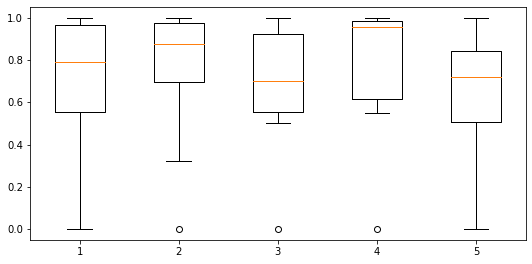

In [24]:
x = [0.0001,0.001, 0.01,0.1  ]
figure(figsize=[7.5,18])
for e in range(len(x)):
    a = []
    for b in range(5):
        final = []
        for n in range(30):
            try:
                data = pd.read_csv("PR_LOD_{0}_{1}_{2}.csv".format(b,x[e], n))
#                 xb = list(data["percentRank"])[-1]
#                 final.append(xb)
                final.append(list(data["percentRank"])[-1])
            except Exception:
                pass
#         print(xb)
        a.append(final)  
    #     print(data)
#         print(a)
    subplot(5,1, x[e]+1)
    boxplot(a)
tight_layout()

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


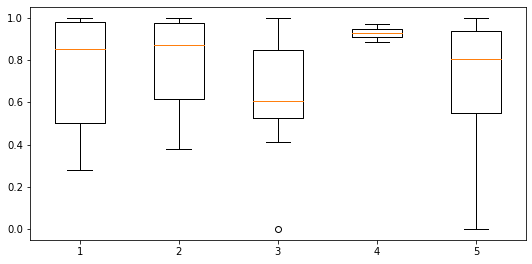

In [29]:
x = [0.0001]
figure(figsize=[7.5,18])
for e in range(len(x)):
    a = []
    for b in range(5):
        final = []
        for n in range(30):
            try:
                data = pd.read_csv("PR_LOD_{0}_{1}_{2}.csv".format(b,x[e], n))
#                 xb = list(data["percentRank"])[-1]
#                 final.append(xb)
                final.append(list(data["percentRank"])[-1])
            except Exception:
                pass
#         print(xb)
        a.append(final)  
    #     print(data)
#         print(a)
#     subplot(5,1, x[e]+0)
    subplot(5,1, x[e]+1)
#     subplot(5,1, x[e]+2)
#     subplot(5,1, x[e]+3)
    boxplot(a)
tight_layout()

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


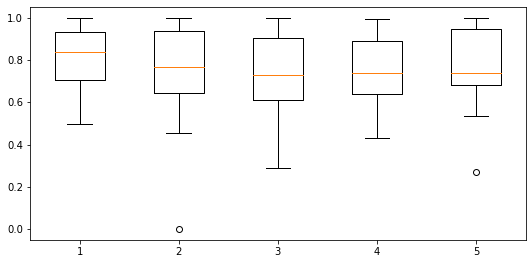

In [30]:
x = [0.001]
figure(figsize=[7.5,18])
for e in range(len(x)):
    a = []
    for b in range(5):
        final = []
        for n in range(30):
            try:
                data = pd.read_csv("PR_LOD_{0}_{1}_{2}.csv".format(b,x[e], n))
#                 xb = list(data["percentRank"])[-1]
#                 final.append(xb)
                final.append(list(data["percentRank"])[-1])
            except Exception:
                pass
#         print(xb)
        a.append(final)  
    #     print(data)
#         print(a)
#     subplot(5,1, x[e]+0)
    subplot(5,1, x[e]+1)
#     subplot(5,1, x[e]+2)
#     subplot(5,1, x[e]+3)
    boxplot(a)
tight_layout()

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


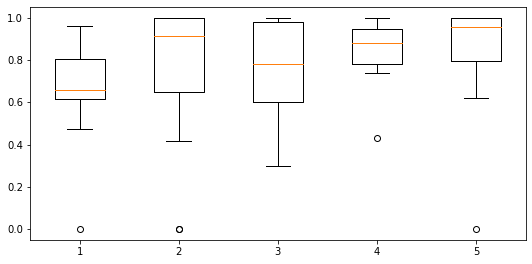

In [31]:
x = [0.01]
figure(figsize=[7.5,18])
for e in range(len(x)):
    a = []
    for b in range(5):
        final = []
        for n in range(30):
            try:
                data = pd.read_csv("PR_LOD_{0}_{1}_{2}.csv".format(b,x[e], n))
#                 xb = list(data["percentRank"])[-1]
#                 final.append(xb)
                final.append(list(data["percentRank"])[-1])
            except Exception:
                pass
#         print(xb)
        a.append(final)  
    #     print(data)
#         print(a)
#     subplot(5,1, x[e]+0)
    subplot(5,1, x[e]+1)
#     subplot(5,1, x[e]+2)
#     subplot(5,1, x[e]+3)
    boxplot(a)
tight_layout()

1.1


C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


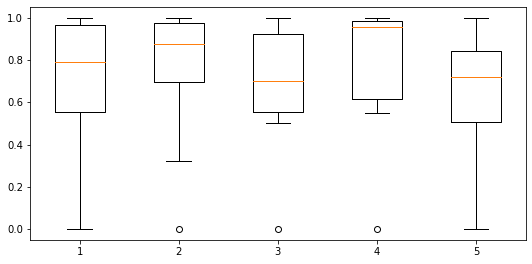

In [39]:
x = [0.1]
figure(figsize=[7.5,18])
for e in range(len(x)):
    a = []
    for b in range(5):
        final = []
        for n in range(30):
            try:
                data = pd.read_csv("PR_LOD_{0}_{1}_{2}.csv".format(b,x[e], n))
#                 xb = list(data["percentRank"])[-1]
#                 final.append(xb)
                final.append(list(data["percentRank"])[-1])
            except Exception:
                pass
#         print(xb)
        a.append(final)  
    #     print(data)
#         print(a)
#     subplot(5,1, x[e]+0)
    print(x[e]+1)
    subplot(5,1,1.1)
#     subplot(5,1, x[e]+2)
#     subplot(5,1, x[e]+3)
    boxplot(a)
tight_layout()

In [34]:
x = [0.1]
for e in range(len(x)):
    print(x[e]+1)

1.1


In [105]:
a

[[0       0.103378
  1       0.250931
  2       0.734024
  3       0.668945
  4       0.529709
            ...   
  1994    0.362274
  1995    0.548264
  1996    0.407013
  1997    0.477356
  1998    0.509659
  Name: percentRank, Length: 1999, dtype: float64,
  0       0.876816
  1       0.519974
  2       0.473907
  3       0.770050
  4       0.547226
            ...   
  1994    0.805283
  1995    0.784363
  1996    0.814713
  1997    0.812744
  1998    0.941849
  Name: percentRank, Length: 1999, dtype: float64,
  0       0.715622
  1       0.597763
  2       0.874390
  3       0.778152
  4       0.651443
            ...   
  1994    0.899948
  1995    0.899063
  1996    1.000000
  1997    1.000000
  1998    1.000000
  Name: percentRank, Length: 1999, dtype: float64,
  0       0.567108
  1       0.689285
  2       0.841293
  3       0.712616
  4       0.694565
            ...   
  1994    0.582397
  1995    0.522385
  1996    0.537827
  1997    0.529999
  1998    0.971970
  Name: per

In [77]:
x = [0.1, 0.01, 0.001, 0.0001]
figure(figsize=[7.5,18])
for env in range(len(x)):
    xb = []
    a = []
    for brain in range(5):
        missing = 0
        final = []
        for n in range(30):
            try:
                data = pd.read_csv("PR_LOD_{0}_{1}_{2}.csv")
                xb = data["percentRank"]
                #final.append(data["percentRank"])
#                 final.append(list(data["percentRank"])
            except Exception:
                missing += 1
            
            #print(final)
       # if missing > 0 :
          #  print(env, brain, len(final))
        #a.append(final)
    print(data)
    #subplot(5,1, env +1)
    #boxplot(a)
#tight_layout()

      Unnamed: 0  generation        ID     score  hits  bites  0_0  \
0              0           0       160  0.000000     0      0    0   
1              1         100     10102  0.434958     0      0    0   
2              2         200     20142  0.000000     0      0    0   
3              3         300     30144  1.808648     0      0    0   
4              4         400     40193  8.370948     0      0    3   
...          ...         ...       ...       ...   ...    ...  ...   
1994        1994      199400  19940155  4.813710     0      0    0   
1995        1995      199500  19950143  0.431027     0      0    0   
1996        1996      199600  19960182  7.938614     0      0    2   
1997        1997      199700  19970136  0.000000     0      0    0   
1998        1998      199800  19980189  4.330824     0      0    4   

      reward_0_0  0_1  reward_0_1  ...  reward_2_3  3_0  reward_3_0  3_1  \
0       0.518826    0   -0.717816  ...    0.015508    0    0.380443    0   
1      

<Figure size 540x1296 with 0 Axes>